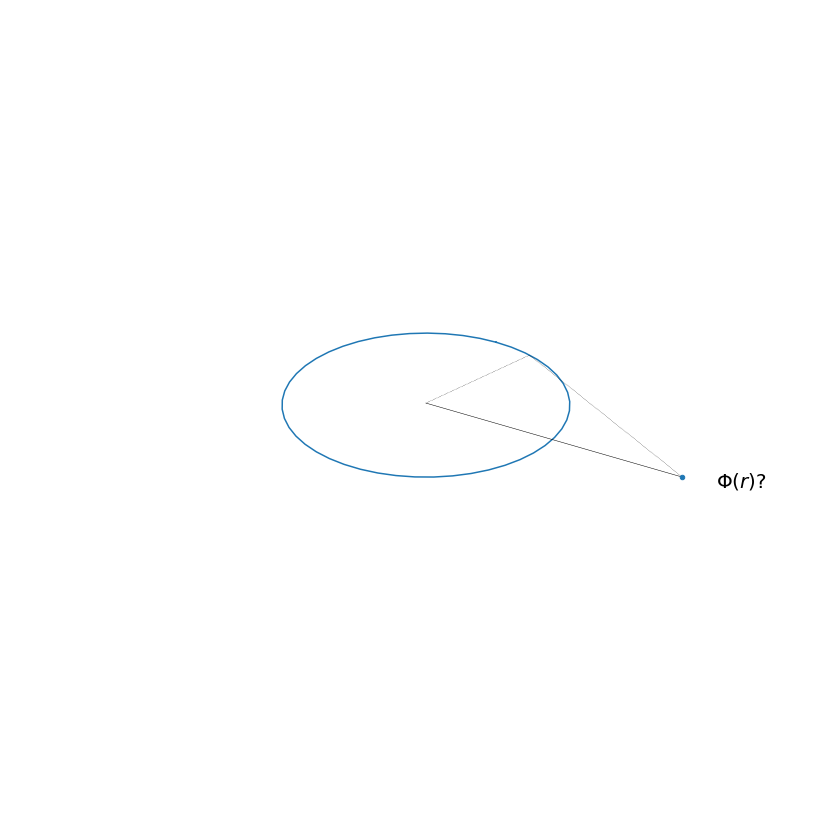

In [355]:
# Jupter Notebook
%matplotlib inline
from IPython.display import display, Math

# Default python math package
import math

# Scientific/Mathematic packages
import numpy as np
import scipy
import scipy.integrate as integrate
import scipy.special as special

# Ergebnisse Plotten
import matplotlib.pyplot as plt

# Symbolic Calculations
import sympy as sp
from sympy.abc import x, y, z, r, phi, alpha, R, theta, Q, a, rho

linespecs = {
    'linewidth': 0.5,
    'color': 'k'
}

figspecs = {
    'figsize': (12,12)
}

def plot_sphere(g):
    ax = fig.add_subplot(g, projection='3d')

    # Create the mesh in polar coordinates and compute corresponding Z.
    r = 2
    p = np.linspace(0, 1.5*np.pi, 50)
    theta = np.linspace(0, np.pi, 50)
    PHI, THETA = np.meshgrid(p, theta)

    # Express the mesh in the cartesian system.
    X = r*np.sin(THETA)*np.cos(PHI)
    Y = r*np.sin(THETA)*np.sin(PHI)
    Z = np.cos(THETA)*r

    # Plot the surface.
    ax.plot_surface(X, Y, Z, cmap=None)
    
    origin = np.array([[0, 0, 0],[0, 0, 0]])
    
def plot_ring(g, r=2):
    ax = fig.add_subplot(g, projection='3d')
    
    p = np.linspace(0, 2*np.pi, 50)
    x = r*np.sin(p)
    y = r*np.cos(p)
    z = 0
    
    ax.plot(x,y,z)
    
def plot_ring_with_r(ax, r=2, angle=0.3, text='$\Phi(r)?$'):
    r = 2
    plot_ring(ax,r)
    
    r0 = (0,0,0)
    rp = (4,0,0)
    rc = (r*math.sin(angle), r*math.cos(angle),0)
    
    r1 = np.array((r0,rp)).transpose()
    r2 = np.array((r0,rc)).transpose()
    r3 = np.array((rc,rp)).transpose()
    
    ax.plot(*r1, **linespecs)
    ax.plot(*r2, **linespecs, linestyle='dotted')
    ax.plot(*r3, **linespecs, linestyle='dotted')
    
    ax.scatter(*rp) 
    ax.text(4.5, 0, 0, text, size=20, zorder=1,  
 color='k') 
    


def intro_img(fig):
    ax = fig.add_subplot(projection='3d')
    lims = [-3.5,3.5]
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    ax.set_zlim(lims)
    plot_ring_with_r(ax)
    ax.set_axis_off()
    
# Plot Frontpage Image
fig = plt.figure(figsize=(15,15))
intro_img(fig)
plt.show()

# Potential eines geladenen Rings in der Ringebene
(Lundbeck, Seiffert, Hofmann)
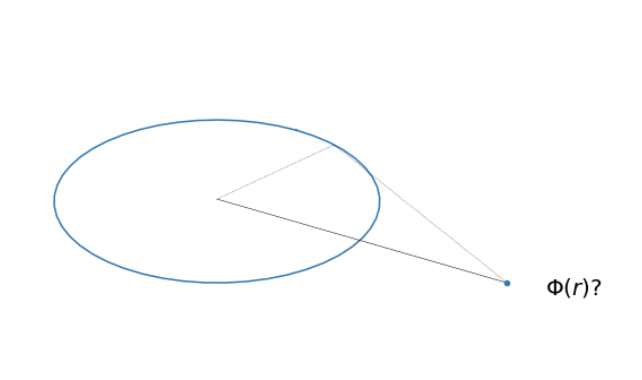

## Aufbau

1. Themenvorstellung

2. Numerische Integration

3. Packages

4. Hohlkugel

5. Ringladung



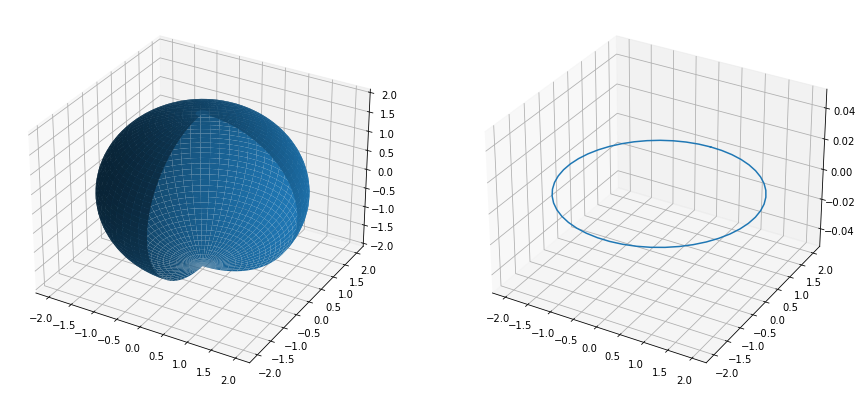

In [356]:
fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize=(15,15), subplot_kw = {'projection':'3d'})
plot_sphere(ax[0])
plot_ring(ax[1])

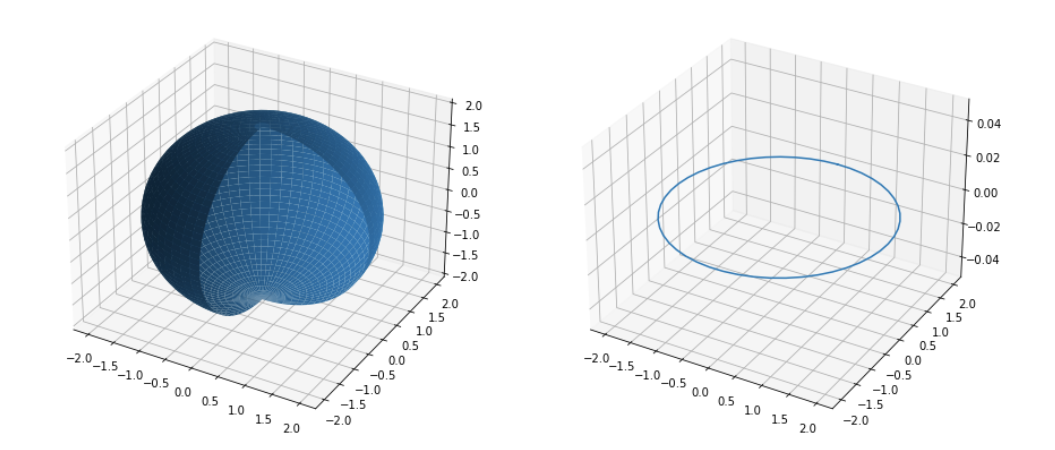

## Numerische Integration/Trapezregel

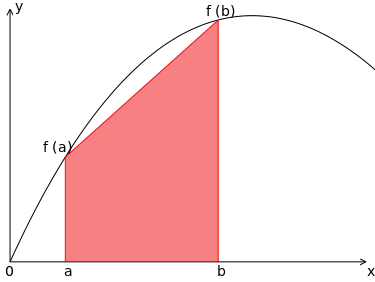
Bildquelle: Wikipedia (https://de.wikipedia.org/wiki/Trapezregel)

$\int_{x_i} ^{x_{i+1}} f(x) dx = \frac{h}{2}[f(x_{i}) + f(x_{i+1})]     \hspace{1cm} i=0,....n-1$


### Beispiel

$\int_{0} ^{2} x dx = [\frac{1}{2} x^2]_{0} ^{2} = 2$

In [357]:
# Zu integrierende Funktion
def func(x):
    return x

# Integral von 0 bis 2
a = 0  # Anfangswert
b = 2  # Endwert
n = 10_000_000  # schritte
h = (b - a) / n  # Schrittweite
result = 0

for i in range(0, n):
    result += (h / 2) * (func(i * h) + func((i + 1) * h))

In [358]:
print(result)

1.9999999999999998


Für Berechnung des Potentials in der Ringebene verwendetes python package:
scipy

## Import der Packages

In [359]:
# Jupyter Notebook
from IPython.display import display, Math

# Default python math package
import math

# Scientific/Mathematic packages
import numpy as np
import scipy
import scipy.integrate as integrate
import scipy.special as special

# Ergebnisse Plotten
import matplotlib.pyplot as plt
import matplotlib.cm

# Symbolic Calculations
import sympy as sp
from sympy.abc import x, y, z, r, phi, alpha, R, theta, Q, a, rho

# Hohlkugel

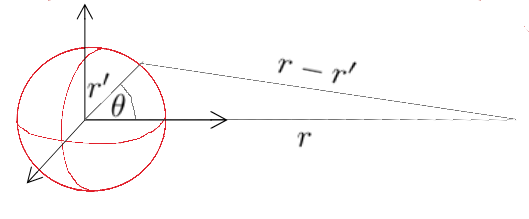

$\Phi=\int_{0}^{R}\int_{0}^{\pi}\int_{0}^{2\pi}\frac{\rho(r')}{4\pi\epsilon_0\cdot|r-r'|}\cdot r'^2\cdot\sin(\theta)d\phi d\theta d r'
$


$\rho(r\neq R) =0$

Es gilt $|r-r'|= \sqrt{r^2+r'^2-2rr'\cos{\theta}}$.

$\Phi=\frac{2\pi}{4\pi\epsilon_0}\int_{0}^{R}\int_{0}^{\pi}\frac{\rho(r')\cdot r'^2\cdot\sin{\theta}}{\sqrt{r^2+r'^2-2rr'\cos{\theta}}}
$

Durch Substitution mit $\cos\theta$:


$\Phi=\frac{2\pi}{4\pi\epsilon_0}\int_{0}^{R}\frac{\rho(r')\cdot r'^2}{0.5\cdot 2\cdot r\cdot r'}\cdot 
\sqrt{r^2+r'^2-2rr'\cos{\theta}}{\Big{|}}_0^\pi$

$\Phi=\frac{2\pi}{4\pi\epsilon_0}\int_{0}^{R}\frac{\rho(r')\cdot r'^2}{r\cdot r'}\cdot (|r+r'|-|r-r'|)dr'$

Fallunterscheidung: $r>r'$: $(|r+r'|-|r-r'|)= 2 r$.

$\Phi=\frac{2\pi}{4\pi\epsilon_0}\int_{0}^{R}\frac{\rho(r')\cdot r'^2}{ r\cdot r'}\cdot 2rdr' = \frac{4\pi\rho(R)\cdot R^2}{4\pi\epsilon_0}\cdot\frac{1}{r}=\frac{Q_{ges}}{4\pi\epsilon_0}\cdot\frac{1}{r}$

Für $r>r'$ : $(|r+r'|-|r-r'|)= 2 r'$.

$\Phi=\frac{2\pi}{4\pi\epsilon_0}\int_{0}^{R}\frac{\rho(r')\cdot r'^2}{ r\cdot r'}\cdot 2r'dr' = \frac{2\pi\rho(R)\cdot R^3}{4\pi\epsilon_0\cdot r\cdot R}\cdot2r=\frac{Q_{ges}}{4\pi\epsilon_0}=\text{const}
$

In [360]:
# Potential in Abhängigkeit von X,Y

#X = Array mit allen x-Koordinaten
#Y = Array mit allen x-Koordinaten
def get_phi(X,Y):
    PHI=[]
    R=1
    Const=8.5
    for x_i, y_i in zip(X, Y):
        z_i = []
        for x_ij, y_ij in zip(x_i, y_i):
            r = math.sqrt(x_ij**2+y_ij**2)
            if r > R:
                z_i.append(Const /r)
            else:
                z_i.append(Const/R)
        PHI.append(z_i)
    return PHI

In [361]:
# E-Feld in Abhängigkeit von r
def get_E(x_r, y_r):
    Ex, Ey = np.zeros((y_r, x_r)), np.zeros((y_r, x_r))
    for i in range(y_r):
        for j in range(x_r):
            y_pos = i-(y_r/2)
            x_pos = j-(x_r/2)
            r = math.sqrt(x_pos**2+y_pos**2)
            if r>=27:
                Ex[i,j] =-2*8.5*(x_pos)/r**2
                Ey[i,j]=-2*8.5*(y_pos)/r**2
            else:
                 Ex[i,j]=0
                 Ey[i,j]=0
    return Ex, Ey

In [362]:
def set_levels(min, max, step):
    l=[]
    for i in range(step):
        l.append(min + (i*max-min)/(step))
    return l

In [363]:
# Grid definieren
x_step, y_step = 100, 100
x = np.linspace(-2, 2, x_step)
y = np.linspace(-2, 2, y_step)

X, Y = np.meshgrid(x, y)

# Phi & E berechnen
Z = get_phi(X,Y)
Ex, Ey = get_E(x_step, y_step)

In [364]:
# Achsenbeschriftung verkürzen
def prepare_axes_sphere(ax):
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_xlim(-2,2)
    ax.set_ylim(-2,2)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')

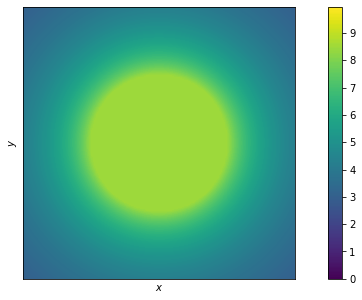

In [365]:
# Figure erzeugen
fig = plt.figure(figsize=(12,5))

# Achsen anpassen
ax = plt.gca()
prepare_axes_sphere(ax)

# Plotten
cp = plt.contourf(X, Y, Z, levels=set_levels(0,10,200))
plt.colorbar(cp)

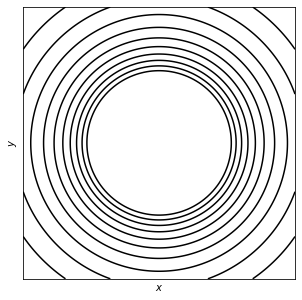

In [366]:
# Figure erzeugen
fig = plt.figure(figsize=(12,5))

# Achsen anpassen
ax = plt.gca()
prepare_axes_sphere(ax)

# Plotten
cp = plt.contour(X, Y, Z, 10, colors='k')

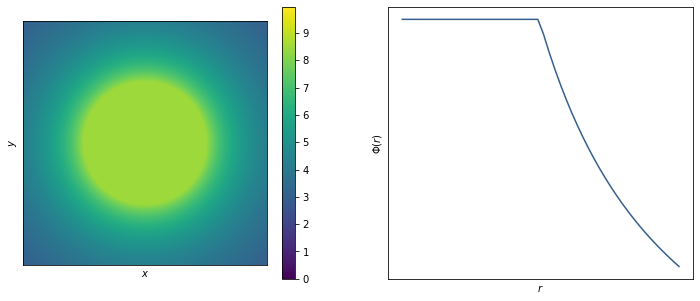

In [367]:
# Plot
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(1,2,(1,1))

# Achsenbeschrifung anpassen
prepare_axes_sphere(ax1)

cp = plt.contourf(X, Y, Z, levels=set_levels(0,10,200))
plt.colorbar(cp)

# Lineplot
ax2 = fig.add_subplot(1,2,2)
plt.plot(X[50][50:],Z[50][50:], color=cm.viridis(0.3))
ax2.set_xlabel('$r$')
ax2.set_ylabel('$\Phi(r)$')
ax2.set_xticks([])
ax2.set_yticks([])
plt.show()

In [368]:
def recreate_fig(fig):
    
    ax = fig.gca()

    cp = plt.contourf(X, Y, Z, levels=set_levels(0,10,200))
    plt.colorbar(cp)

    prepare_axes_sphere(ax)
    return ax

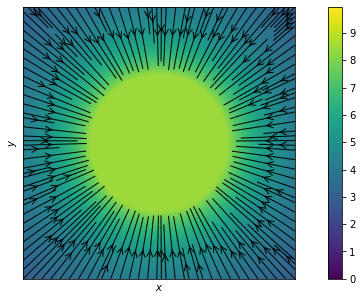

In [369]:
fig = plt.figure(figsize=(12,5))

# Vorherigen Plot neu erstellen
ax = recreate_fig(fig)
# ...

# E-Feld
ax.streamplot(x, y, Ex, Ey, color='black', linewidth=1, cmap=plt.cm.inferno,
              density=2, arrowstyle='->', arrowsize=1.5)
plt.show()

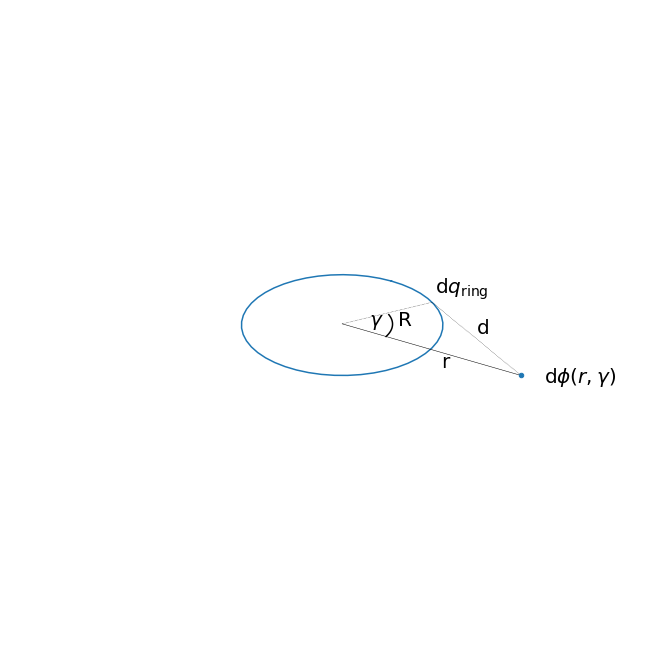

In [370]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(projection='3d')
lims = [-4,4]
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.set_zlim(lims)
plot_ring_with_r(ax, angle=0.6, text='$\mathrm{d}\phi(r,\gamma)$')

plt.plot(np.cos(np.linspace(0,.9,20)),np.sin(np.linspace(0,.9,20)), 'k')

ax.text(1,0.5,0,"R", size=20)
ax.text(2.5,1,0,"d", size=20)
ax.text(2.5,-0.5,0,"r", size=20)
ax.text(1,2,0,"$\mathrm{d}q_\mathrm{ring}$", size=20)
ax.text(0.5,0.2,0,"$\gamma$", size=20)
ax.set_axis_off()

### Ringladung
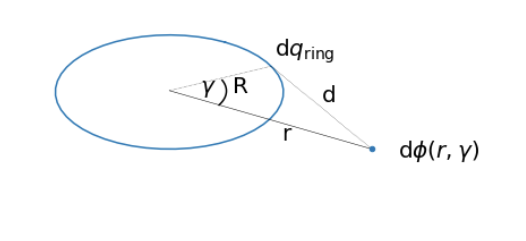

$\mathrm{d}\phi \sim \dfrac{1}{|d|}\mathrm{d}q_\mathrm{ring}$

$\mathrm{d}\phi \sim \dfrac{1}{|d|}\mathrm{d}q_\mathrm{ring}$

In [371]:
# Radius Ring
R = 2

# Ableitung als Funktion definieren
def dpot(gamma,r):
    dist = R*math.sqrt(((R*np.sin(gamma))**2+(R*np.cos(gamma)-r)**2))
    if dist != 0:
        return 1/dist
    else:
        return 0

In [372]:
# Trapezregel
def integrate_for_fix_r_trapezregel(r, n=10):
    if r == R:
        return np.Inf
    dstep = 2*np.pi/n
    return integrate.trapezoid([dpot(gamma,r)*dstep for gamma in np.linspace(0,2*np.pi,n)])

# Bezugsniveau r=0 anpassen
def pot_r_trapezregel(r, n=10):
    return integrate_for_fix_r_trapezregel(r,n)-integrate_for_fix_r_trapezregel(0, n)

In [373]:
print('r = R:',pot_r_trapezregel(R))
print('r = 0:',pot_r_trapezregel(0))
print('r = 1.5:',pot_r_trapezregel(1.5))
print('r = 3:',pot_r_trapezregel(3))

r = R: inf
r = 0: 0.0
r = 1.5: 0.36733698772225654
r = 3: -0.31571313027140335


In [374]:
print('r = R:',pot_r_trapezregel(R, 50))
print('r = 0:',pot_r_trapezregel(0, 50))
print('r = 1.5:',pot_r_trapezregel(1.5, 50))
print('r = 3:',pot_r_trapezregel(3, 50))

r = R: inf
r = 0: 0.0
r = 1.5: 0.33338986566878015
r = 3: -0.35706430268901146


In [377]:
# SciPy nutzt Fortran-Quadpack
def integrate_for_fix_r(r):
    if r == R:
        return np.Inf
    return integrate.quad(lambda gamma: dpot(gamma,r), 0, math.pi*2)[0]

# Bezugsniveau r=0 anpassen
def pot_r(r):
    return integrate_for_fix_r(r)-integrate_for_fix_r(0)

In [378]:
print('r = R:',pot_r(R))
print('r = 0:',pot_r(0))
print('r = 1.5:',pot_r(1.5))
print('r = 3:',pot_r(3))

r = R: inf
r = 0: 0.0
r = 1.5: 0.34019345395693223
r = 3: -0.3643513298038379


In [379]:
# Array of r values
r_vals = np.linspace(0,40,100)

# r_pot für jedes r berechnen
vfunc = np.vectorize(pot_r)
vfunc_trapez_10 = np.vectorize(pot_r_trapezregel)
vfunc_trapez_50 = np.vectorize(lambda x: pot_r_trapezregel(x, 50))

phi_vals = vfunc(r_vals)
phi_vals_trapez_10 = vfunc_trapez_10(r_vals)
phi_vals_trapez_50 = vfunc_trapez_50(r_vals)

In [382]:
def prepare_axes_comparison(ax):
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('$r$')
    ax.set_ylabel('$\phi(r)_{\mathrm{prop}}$')

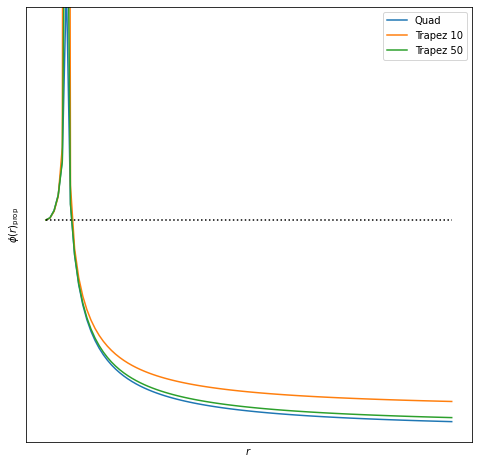

In [397]:
# Plotten
fig = plt.figure(figsize=(8,8))
plt.plot(r_vals, phi_vals)
plt.plot(r_vals, phi_vals_trapez_10)
plt.plot(r_vals, phi_vals_trapez_50)

# Achsen anpassen
ax = plt.gca()
ax.legend(['Quad', 'Trapez 10', 'Trapez 50'])
ax.set_ylim(phi_vals.min()*1.1,0.9*phi_vals.max())
prepare_axes_comparison(ax)

_ = plt.plot([0, r_vals.max()], [0,0], 'k', linestyle='dotted')

In [391]:
# Achsenlimits/Beschriftung anpassen
def prepare_axes(ax):
    
    limit = 1/np.sqrt(2)*r_vals.max()
    
    ax.set_xlim((-limit, limit))
    ax.set_ylim((-limit, limit))
    ax.set_xticks([])
    ax.set_yticks([])
    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    
    try:
        ax.set_zlabel('$\phi(r)_{\mathrm{prop}}$')
        ax.set_zticks([])
    except:
        ax.set_aspect('equal')

In [390]:
# Winkel/Grid
angle_vals = np.linspace(0, 2*math.pi, 50)
[angle, r] = np.meshgrid(angle_vals, r_vals)

# Phi Value jedem Eintrag zuordnen
z_t = np.ones(angle.shape).transpose()*phi_vals.transpose()
z = z_t.transpose()

# X,y aus Winkel und r berechnen
X = r * np.cos(angle)
Y = r * np.sin(angle)

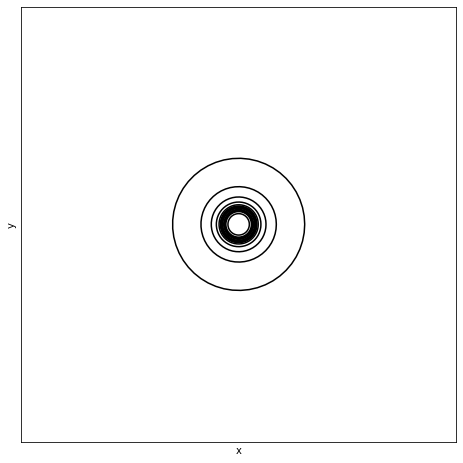

In [392]:
# Plot
fig = plt.figure(figsize=(8,8))
plt.contour(X, Y, z, 10, colors='k', linestyles="solid")

ax = plt.gca()
prepare_axes(ax)

plt.show()

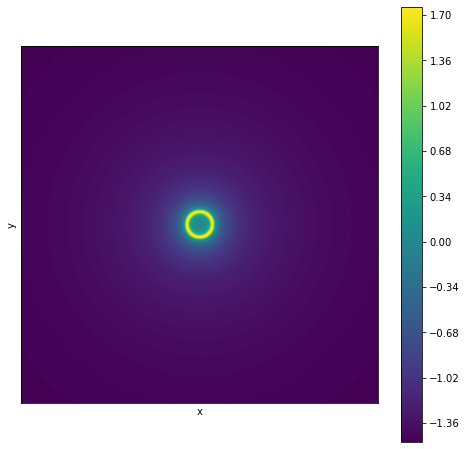

In [393]:
# Plot
fig = plt.figure(figsize=(8,8))

cp = plt.contourf(X, Y, z, 200)
bar = plt.colorbar(cp)

ax = plt.gca()
prepare_axes(ax)

plt.show()

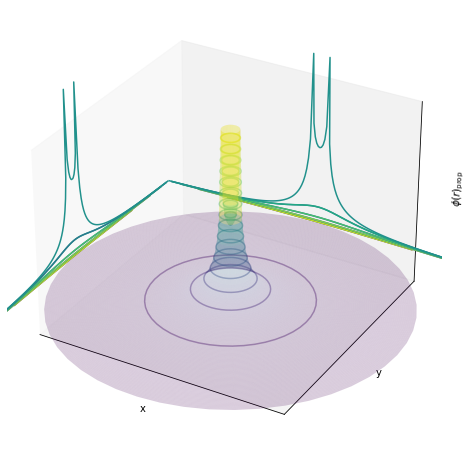

In [394]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection="3d")
prepare_axes(ax)

ax.plot_surface(X, Y, z, cmap="viridis", lw=0.5, rstride=1, cstride=1, alpha=0.2)
ax.contour(X, Y, z, 20, cmap="viridis", linestyles="solid", alpha=.4)
ax.contour(X, Y, z, 10, zdir='y', offset=Y.max(), cmap="viridis", linestyles="solid")
ax.contour(X, Y, z, 10, zdir='x', offset=X.min(), cmap="viridis", linestyles="solid")

plt.show()

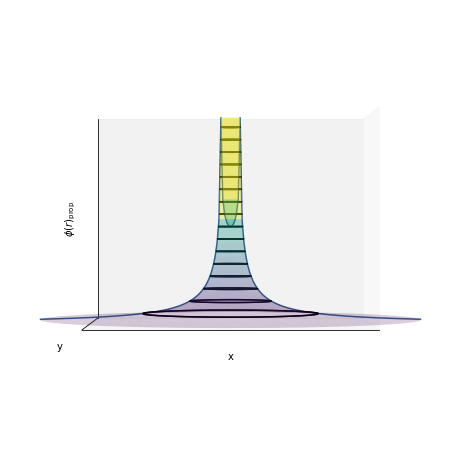

In [395]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection="3d")
prepare_axes(ax)

ax.plot_surface(X, Y, z, cmap="viridis", lw=0.5, rstride=1, cstride=1, alpha=0.2)
ax.contour(X, Y, z, 20, cmap="viridis", linestyles="solid")
ax.contour(X, Y, z, 20, colors="k", linestyles="solid")
ax.view_init(elev=0, azim=90)

ax.plot(r_vals, r_vals*0, phi_vals, color=cm.viridis(0.3))
ax.plot(-r_vals, r_vals*0, phi_vals, color=cm.viridis(0.3))
plt.show()

Vielen Dank für die Aufmerksamkeit!

Die .ipynb-Datei und Slides sind auf Github verfügbar:
``https://github.com/GithubMarius/GeladenerRing.git``

In [396]:
## TODO: LINK ZUM REPOSITORY
